In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [46]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

In [47]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


In [48]:
df.dropna(inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.7 MB


In [49]:
# Visualizing geographical distribution of median house values
fig = px.scatter_map(
    df,
    lat="latitude",
    lon="longitude",
    hover_name="ocean_proximity",
    color="median_house_value",
    zoom=6,
    height=600,
    map_style="open-street-map"
)
fig.show()


In [50]:
# Preparing data for modeling

X = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

In [51]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
# Combining X_train and y_train back into a single DataFrame for training data

training_data = X_train.join(y_train)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18818,-120.24,39.67,40.0,690.0,129.0,305.0,110.0,2.3625,INLAND,62500.0
1676,-122.26,38.04,41.0,2512.0,539.0,1179.0,480.0,2.6940,NEAR BAY,123000.0
9977,-122.48,38.54,37.0,1898.0,359.0,973.0,340.0,4.2096,INLAND,256600.0
17863,-121.91,37.42,19.0,1684.0,387.0,1224.0,376.0,4.1389,<1H OCEAN,174100.0
5452,-118.46,34.00,39.0,4098.0,1100.0,2054.0,1053.0,2.9180,<1H OCEAN,345600.0
...,...,...,...,...,...,...,...,...,...,...
7358,-118.17,33.96,29.0,2913.0,787.0,3803.0,740.0,2.5556,<1H OCEAN,146500.0
8562,-118.41,33.92,38.0,1437.0,272.0,590.0,250.0,5.2338,<1H OCEAN,358000.0
16254,-121.26,37.98,41.0,1633.0,433.0,885.0,413.0,0.9782,INLAND,54200.0
9224,-120.06,36.95,24.0,646.0,134.0,454.0,149.0,2.1250,INLAND,61900.0


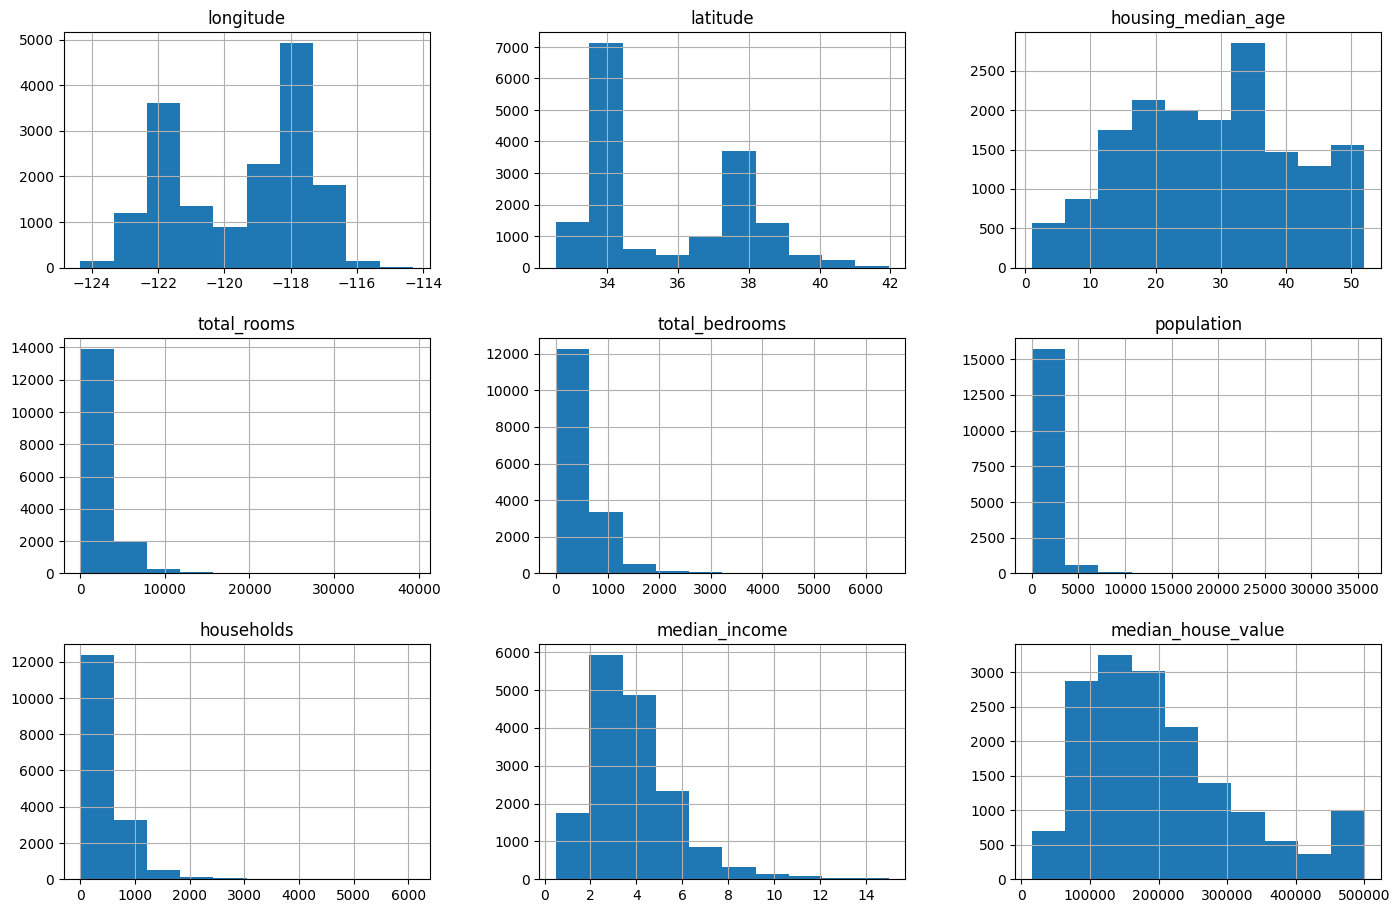

In [53]:
# Visualizing distributions of features in the training data

training_data.hist(figsize=(17,11))
plt.show()

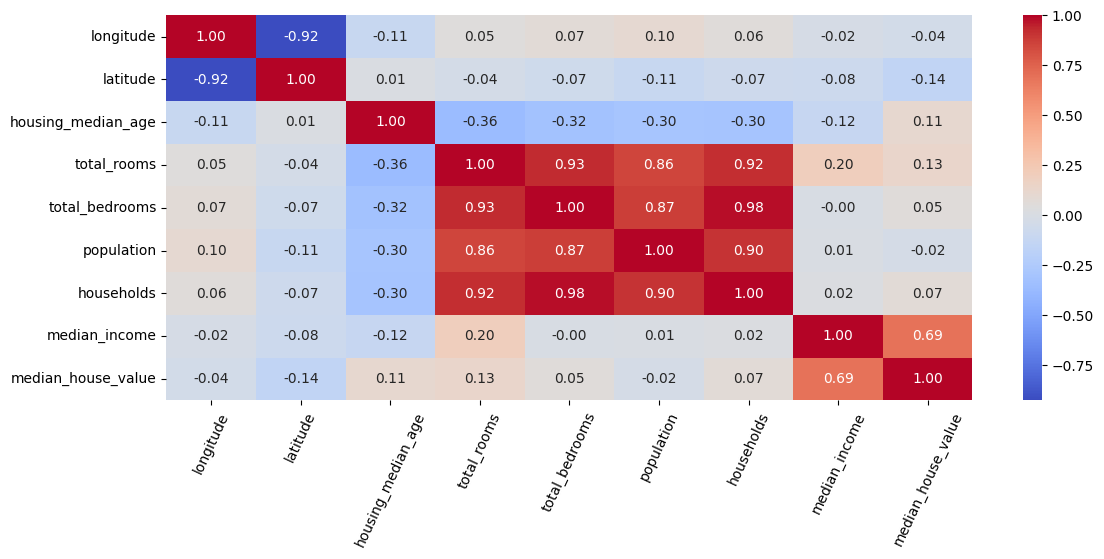

In [54]:
# Correlation heatmap of numerical features in the training data

plt.figure(figsize=(13, 5))
sns.heatmap(training_data.select_dtypes("number").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation=65)
plt.show()

# Pre-Processing 

In [55]:
# Use natural logarith to make the distributions more normal

training_data["total_rooms"] = np.log(training_data["total_rooms"] + 1)
training_data["total_bedrooms"] = np.log(training_data["total_bedrooms"] + 1)
training_data["population"] = np.log(training_data["population"] + 1)
training_data["households"] = np.log(training_data["households"] + 1)

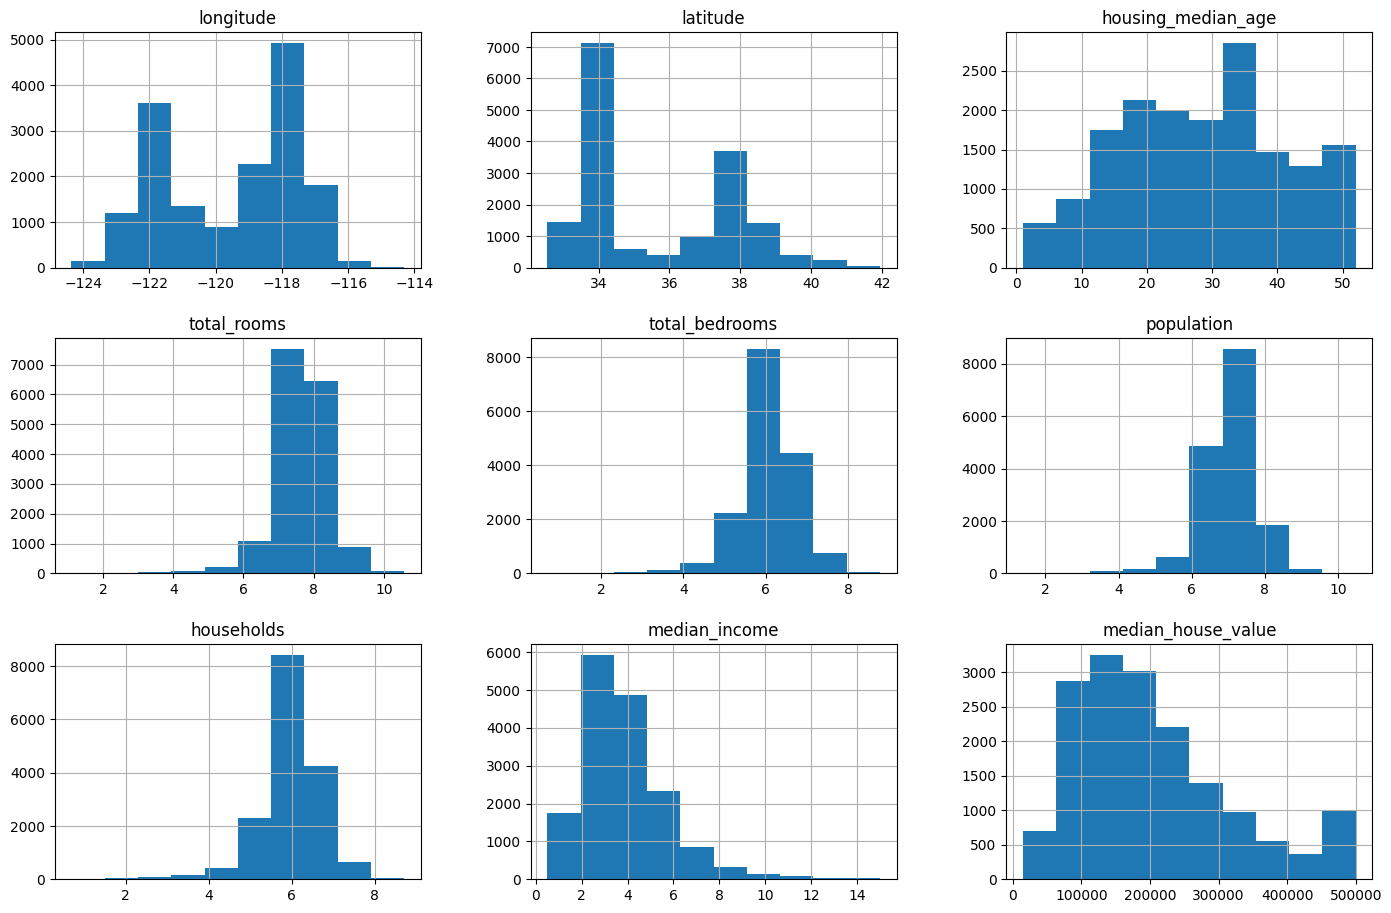

In [56]:
# Visualizing distributions of features in the training data after log transformation

training_data.hist(figsize=(17, 11))
plt.show()

In [57]:
training_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7241
INLAND        5218
NEAR OCEAN    2103
NEAR BAY      1780
ISLAND           4
Name: count, dtype: int64

In [58]:
# One-hot encoding for the 'ocean_proximity' categorical feature

training_data = training_data.join(pd.get_dummies(training_data["ocean_proximity"], dtype=int)).drop("ocean_proximity", axis=1)

In [59]:
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18818,-120.24,39.67,40.0,6.538140,4.867534,5.723585,4.709530,2.3625,62500.0,0,1,0,0,0
1676,-122.26,38.04,41.0,7.829233,6.291569,7.073270,6.175867,2.6940,123000.0,0,0,0,1,0
9977,-122.48,38.54,37.0,7.549083,5.886104,6.881411,5.831882,4.2096,256600.0,0,1,0,0,0
17863,-121.91,37.42,19.0,7.429521,5.961005,7.110696,5.932245,4.1389,174100.0,1,0,0,0,0
5452,-118.46,34.00,39.0,8.318498,7.003974,7.628031,6.960348,2.9180,345600.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7358,-118.17,33.96,29.0,7.977282,6.669498,8.243808,6.608001,2.5556,146500.0,1,0,0,0,0
8562,-118.41,33.92,38.0,7.271009,5.609472,6.381816,5.525453,5.2338,358000.0,1,0,0,0,0
16254,-121.26,37.98,41.0,7.398786,6.073045,6.786717,6.025866,0.9782,54200.0,0,1,0,0,0
9224,-120.06,36.95,24.0,6.472346,4.905275,6.120297,5.010635,2.1250,61900.0,0,1,0,0,0


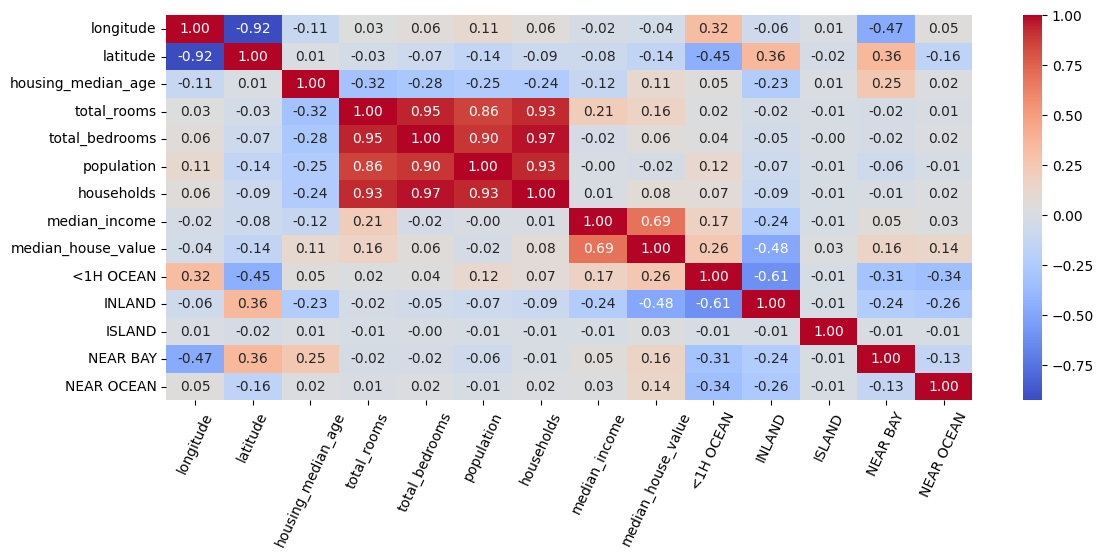

In [60]:
# Correlation heatmap of numerical features in the training data

plt.figure(figsize=(13, 5))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.xticks(rotation=65)
plt.show()

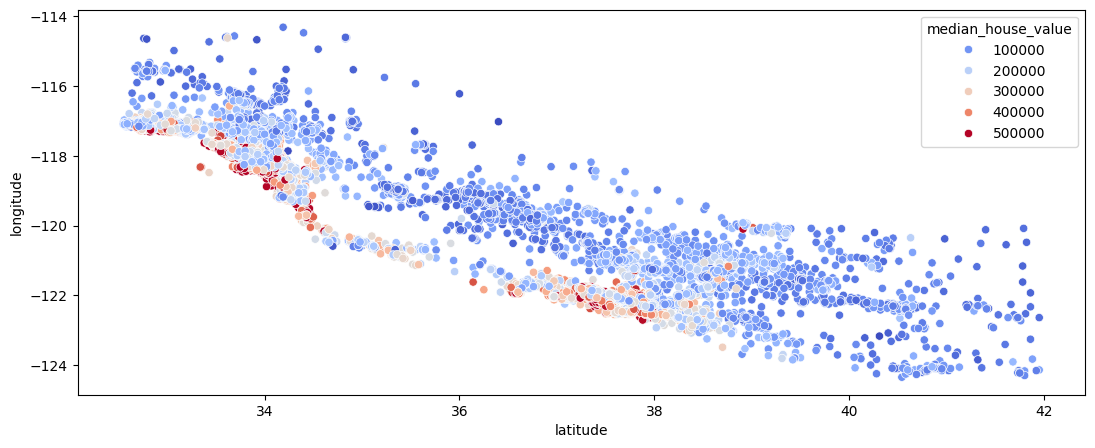

In [61]:
# Geographical scatter plot colored by median house value
plt.figure(figsize=(13, 5))
sns.scatterplot(x="latitude", y="longitude", data=training_data, hue="median_house_value", palette="coolwarm")
plt.show()

## Feature Engineering

In [62]:
training_data["bedroom_ratio"] = training_data["total_bedrooms"]/training_data["total_rooms"]
training_data["household_rooms"] = training_data["total_rooms"]/training_data["households"]

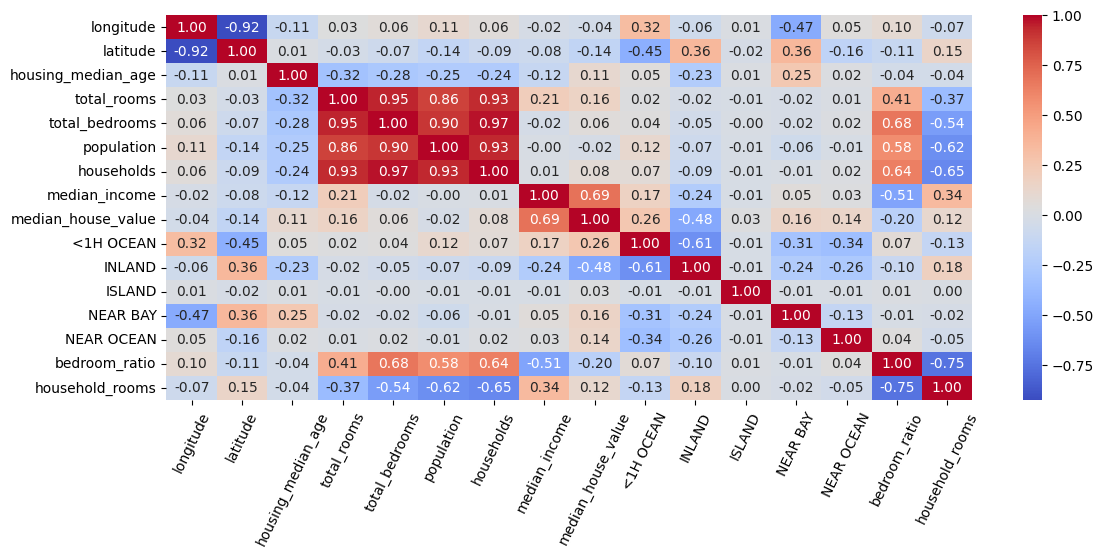

In [63]:
# Use heatmap to see correlations again
plt.figure(figsize=(13, 5))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.xticks(rotation=64)
plt.show()

## Model Building

In [64]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18818,-120.24,39.67,40.0,690.0,129.0,305.0,110.0,2.3625,INLAND
1676,-122.26,38.04,41.0,2512.0,539.0,1179.0,480.0,2.6940,NEAR BAY
9977,-122.48,38.54,37.0,1898.0,359.0,973.0,340.0,4.2096,INLAND
17863,-121.91,37.42,19.0,1684.0,387.0,1224.0,376.0,4.1389,<1H OCEAN
5452,-118.46,34.00,39.0,4098.0,1100.0,2054.0,1053.0,2.9180,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
7358,-118.17,33.96,29.0,2913.0,787.0,3803.0,740.0,2.5556,<1H OCEAN
8562,-118.41,33.92,38.0,1437.0,272.0,590.0,250.0,5.2338,<1H OCEAN
16254,-121.26,37.98,41.0,1633.0,433.0,885.0,413.0,0.9782,INLAND
9224,-120.06,36.95,24.0,646.0,134.0,454.0,149.0,2.1250,INLAND


In [65]:
X_train, y_train = training_data.drop(["median_house_value"], axis=1), training_data["median_house_value"]

In [66]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18818,-120.24,39.67,40.0,6.538140,4.867534,5.723585,4.709530,2.3625,0,1,0,0,0,0.744483,1.388279
1676,-122.26,38.04,41.0,7.829233,6.291569,7.073270,6.175867,2.6940,0,0,0,1,0,0.803600,1.267714
9977,-122.48,38.54,37.0,7.549083,5.886104,6.881411,5.831882,4.2096,0,1,0,0,0,0.779711,1.294450
17863,-121.91,37.42,19.0,7.429521,5.961005,7.110696,5.932245,4.1389,1,0,0,0,0,0.802340,1.252396
5452,-118.46,34.00,39.0,8.318498,7.003974,7.628031,6.960348,2.9180,1,0,0,0,0,0.841976,1.195127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7358,-118.17,33.96,29.0,7.977282,6.669498,8.243808,6.608001,2.5556,1,0,0,0,0,0.836061,1.207216
8562,-118.41,33.92,38.0,7.271009,5.609472,6.381816,5.525453,5.2338,1,0,0,0,0,0.771485,1.315912
16254,-121.26,37.98,41.0,7.398786,6.073045,6.786717,6.025866,0.9782,0,1,0,0,0,0.820816,1.227838
9224,-120.06,36.95,24.0,6.472346,4.905275,6.120297,5.010635,2.1250,0,1,0,0,0,0.757882,1.291722


### Linear Regression Model

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [68]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17993,-121.95,37.28,19.0,7027.0,1847.0,3759.0,1753.0,3.1509,<1H OCEAN
6027,-117.74,34.06,48.0,2438.0,599.0,1508.0,548.0,2.8983,INLAND
15606,-116.62,32.86,18.0,4115.0,847.0,2032.0,745.0,4.0159,<1H OCEAN
18874,-122.22,38.08,37.0,4590.0,857.0,2920.0,832.0,3.4360,NEAR BAY
8847,-118.40,34.09,45.0,2686.0,283.0,857.0,259.0,15.0001,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
9827,-121.92,36.62,52.0,2584.0,599.0,790.0,444.0,2.5263,NEAR OCEAN
7940,-118.12,33.86,44.0,2663.0,511.0,1277.0,462.0,4.3194,<1H OCEAN
7959,-118.18,33.88,44.0,1308.0,267.0,783.0,237.0,4.7361,<1H OCEAN
12851,-121.37,38.68,29.0,3757.0,646.0,2022.0,611.0,3.5429,INLAND


In [69]:
testing_data = X_test.join(y_test)

# Take the natural logarithm of the same features in the test set
testing_data["total_rooms"] = np.log(testing_data["total_rooms"] + 1)
testing_data["total_bedrooms"] = np.log(testing_data["total_bedrooms"] + 1)
testing_data["population"] = np.log(testing_data["population"] + 1)
testing_data["households"] = np.log(testing_data["households"] + 1)

# One-hot encoding for categorical feature in test set
testing_data = testing_data.join(pd.get_dummies(testing_data["ocean_proximity"], dtype=int)).drop(["ocean_proximity"], axis=1)

# Same feature engineering on test set
testing_data["bedroom_ratio"] = testing_data["total_bedrooms"]/testing_data["total_rooms"]
testing_data["household_rooms"] = testing_data["total_rooms"]/testing_data["households"]

In [70]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17993,-121.95,37.28,19.0,7027.0,1847.0,3759.0,1753.0,3.1509,<1H OCEAN
6027,-117.74,34.06,48.0,2438.0,599.0,1508.0,548.0,2.8983,INLAND
15606,-116.62,32.86,18.0,4115.0,847.0,2032.0,745.0,4.0159,<1H OCEAN
18874,-122.22,38.08,37.0,4590.0,857.0,2920.0,832.0,3.4360,NEAR BAY
8847,-118.40,34.09,45.0,2686.0,283.0,857.0,259.0,15.0001,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
9827,-121.92,36.62,52.0,2584.0,599.0,790.0,444.0,2.5263,NEAR OCEAN
7940,-118.12,33.86,44.0,2663.0,511.0,1277.0,462.0,4.3194,<1H OCEAN
7959,-118.18,33.88,44.0,1308.0,267.0,783.0,237.0,4.7361,<1H OCEAN
12851,-121.37,38.68,29.0,3757.0,646.0,2022.0,611.0,3.5429,INLAND


In [71]:
X_test, y_test = testing_data.drop(["median_house_value"], axis=1), testing_data["median_house_value"]

In [72]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17993,-121.95,37.28,19.0,8.857657,7.521859,8.232174,7.469654,3.1509,1,0,0,0,0,0.849193,1.185819
6027,-117.74,34.06,48.0,7.799343,6.396930,7.319202,6.308098,2.8983,0,1,0,0,0,0.820188,1.236402
15606,-116.62,32.86,18.0,8.322637,6.742881,7.617268,6.614726,4.0159,1,0,0,0,0,0.810186,1.258198
18874,-122.22,38.08,37.0,8.431853,6.754604,7.979681,6.725034,3.4360,0,0,0,1,0,0.801082,1.253801
8847,-118.40,34.09,45.0,7.896181,5.648974,6.754604,5.560682,15.0001,1,0,0,0,0,0.715406,1.420002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,-121.92,36.62,52.0,7.857481,6.396930,6.673298,6.098074,2.5263,0,0,0,0,1,0.814120,1.288518
7940,-118.12,33.86,44.0,7.887584,6.238325,7.153052,6.137727,4.3194,1,0,0,0,0,0.790904,1.285099
7959,-118.18,33.88,44.0,7.177019,5.590987,6.664409,5.472271,4.7361,1,0,0,0,0,0.779012,1.311525
12851,-121.37,38.68,29.0,8.231642,6.472346,7.612337,6.416732,3.5429,0,1,0,0,0,0.786276,1.282840


In [73]:
model.score(X_test, y_test)

0.6745623972706074

### Default/Baseline Random Forest Model 

In [74]:
model_1 = RandomForestRegressor()
model_1.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

##### Score of Baseline RFR Model

In [75]:
model_1.score(X_test, y_test)

0.8162062354427195

### Tuned/Custom Random Forest Regressor Model

In [76]:
# Hyperparameter tuning using GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also 

In [77]:
# Get the best parameters from the grid search
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

##### Score of Tuned RFR Model

In [78]:
#now evaluate the best model from grid search on the test set
grid_search.best_estimator_.score(X_test, y_test)

0.8128871858451627